In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
def EDA(data):
    # Statistics description like (mean, mode, median)
    print("Descriptive Statistics:")
    print(data.describe())

    # Histograms for numeric data
    print("\nHistograms:")
    for column in data.select_dtypes(include='number'):
        plt.figure(figsize=(6, 4))
        sns.histplot(data[column], bins=20, kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

    # Bar charts for categorical data and object type data
    print("\nBar Charts:")
    for column in data.columns:
        if isinstance(data[column].dtype, pd.CategoricalDtype):  # if categorical
            plt.figure(figsize=(6, 4))
            sns.countplot(data[column])
            plt.title(f'Bar Chart of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()
        elif data[column].dtype == 'object':  # object dtype for categorical variables
            plt.figure(figsize=(6, 4))
            sns.countplot(data[column])
            plt.title(f'Bar Chart of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

Missing values before handling:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Descriptive Statistics:
   

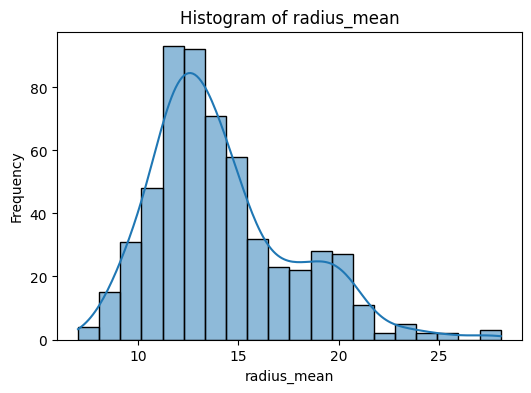

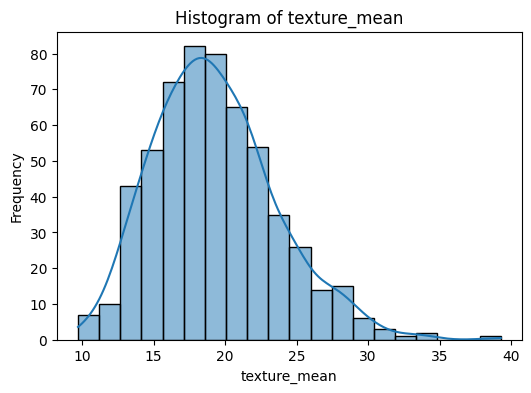

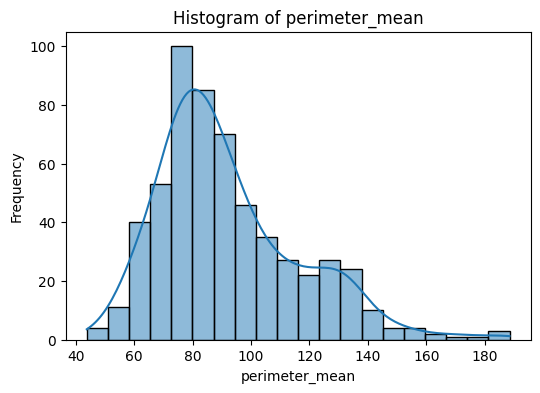

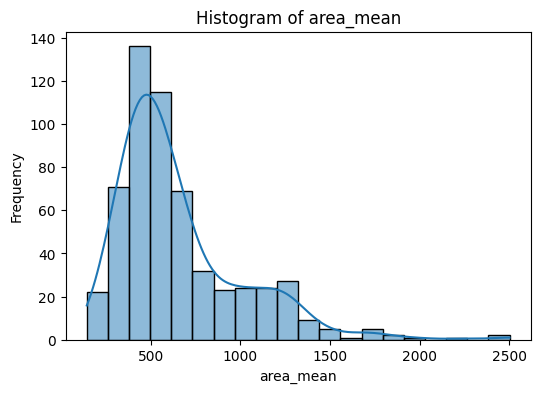

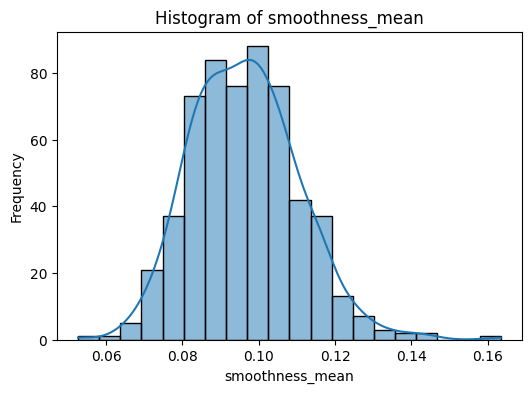

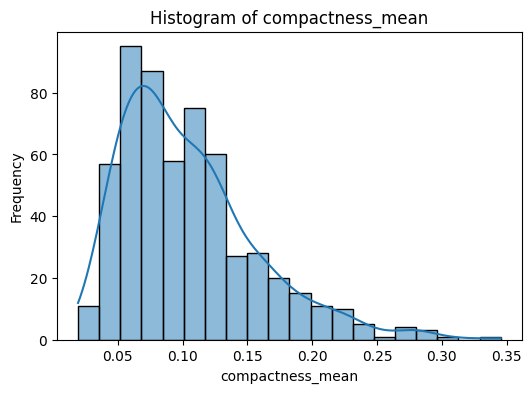

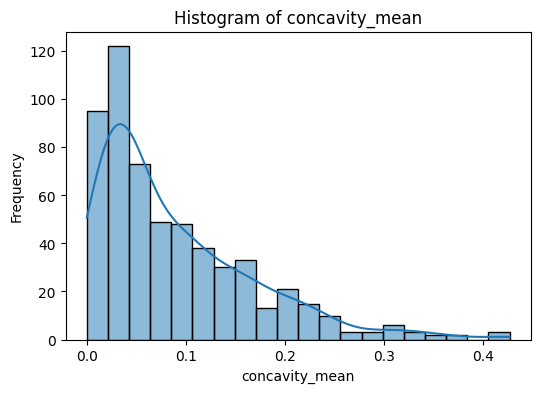

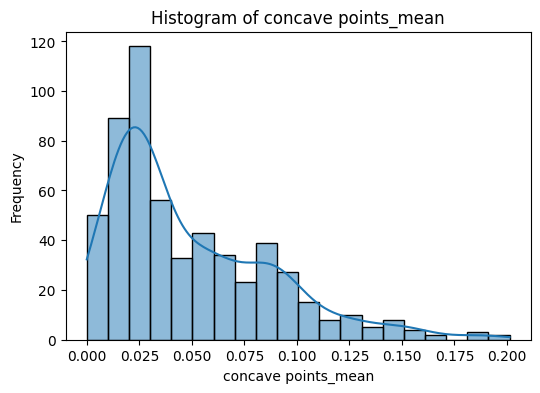

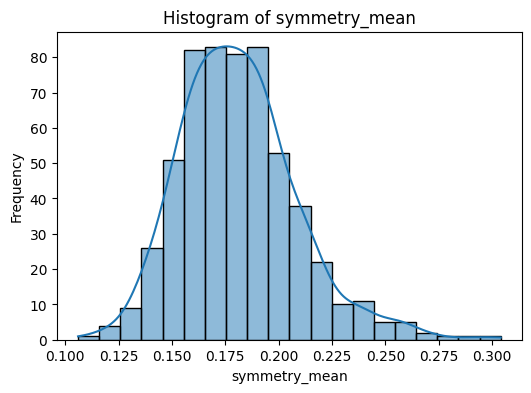

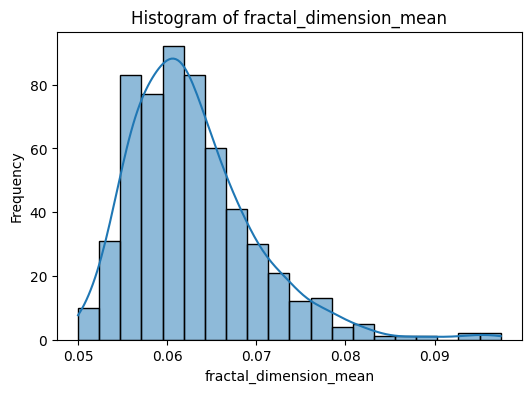

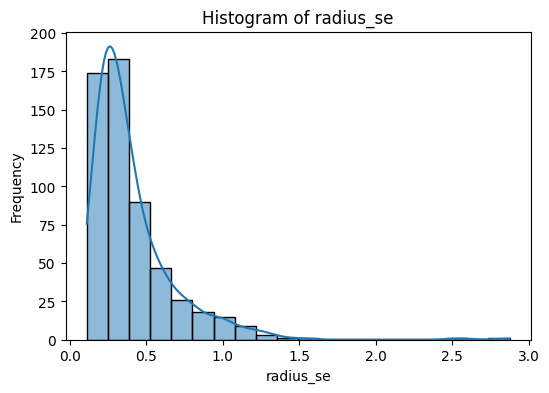

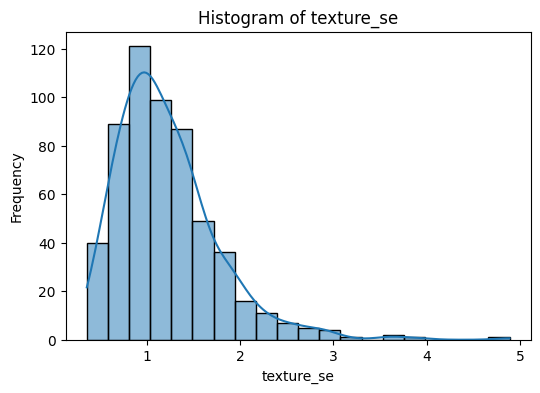

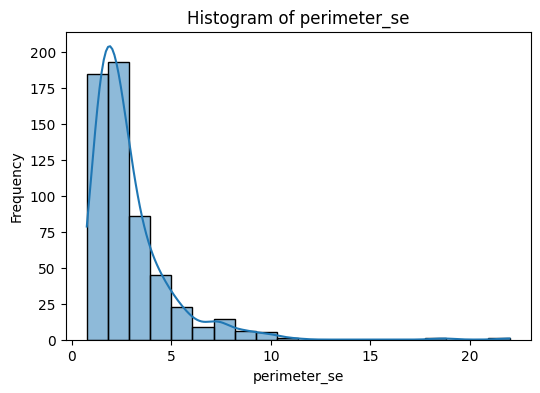

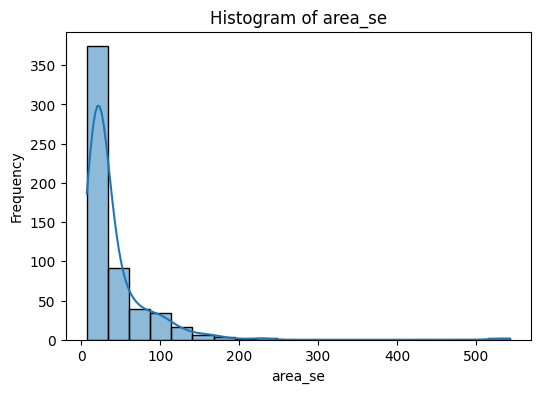

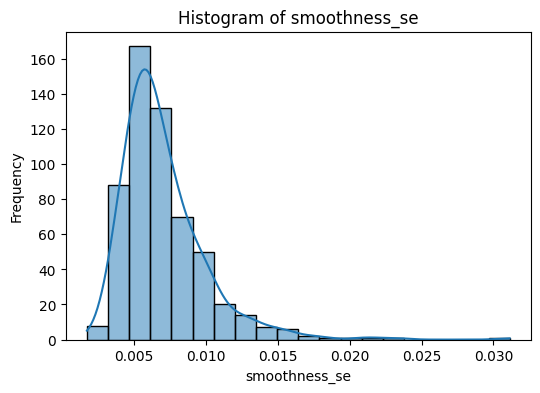

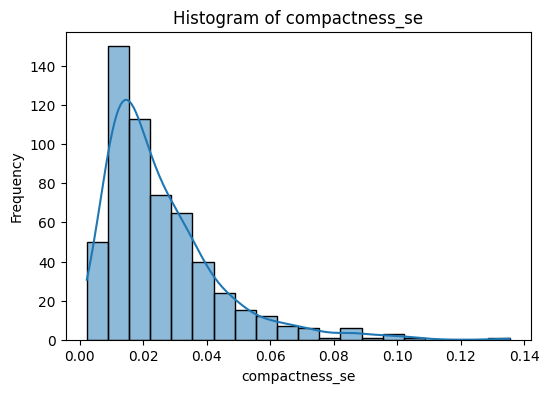

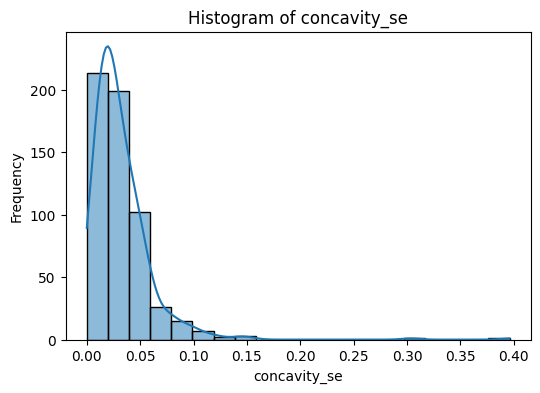

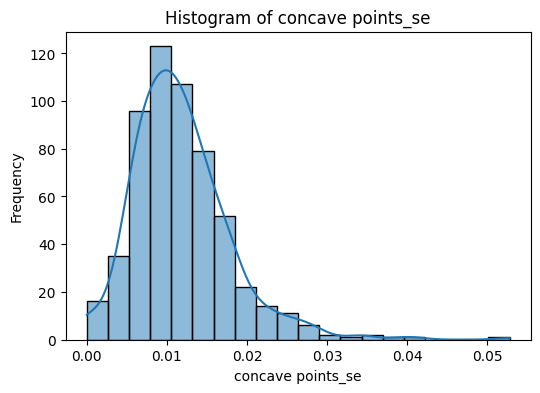

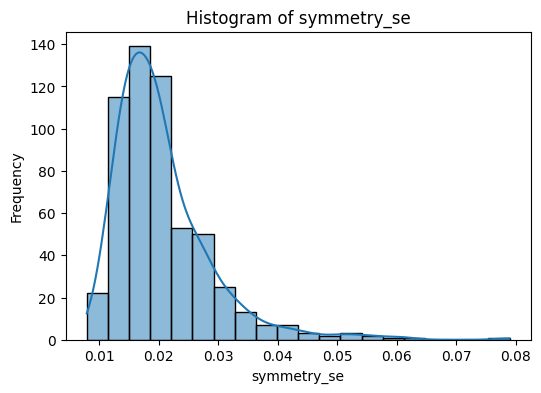

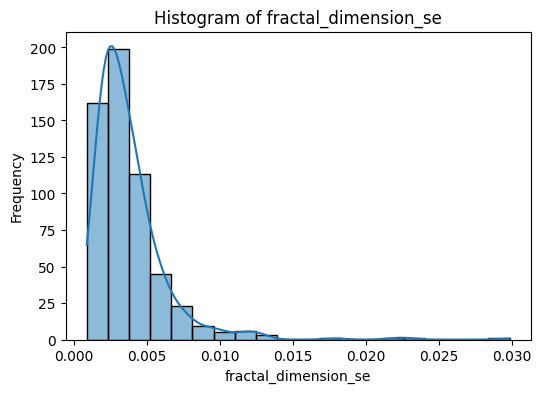

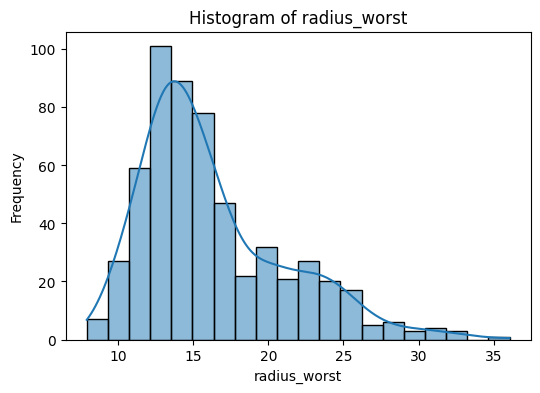

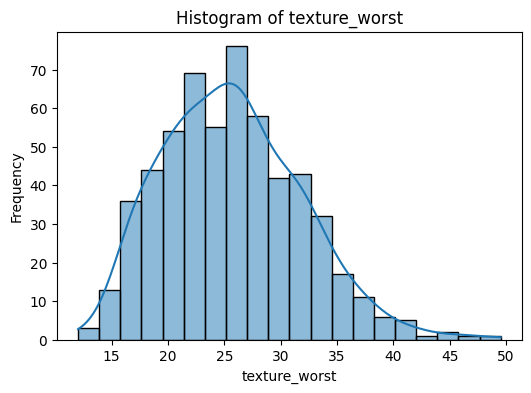

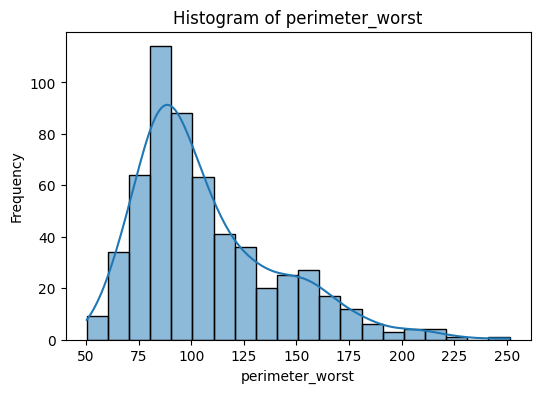

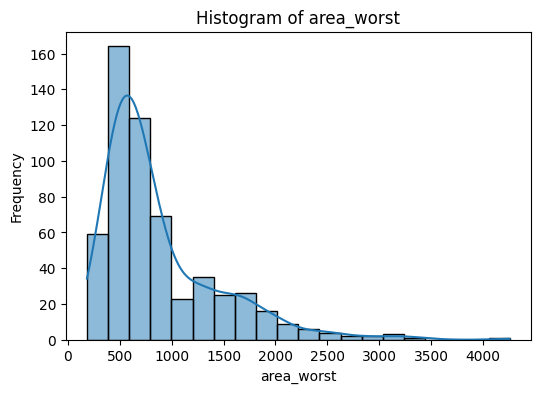

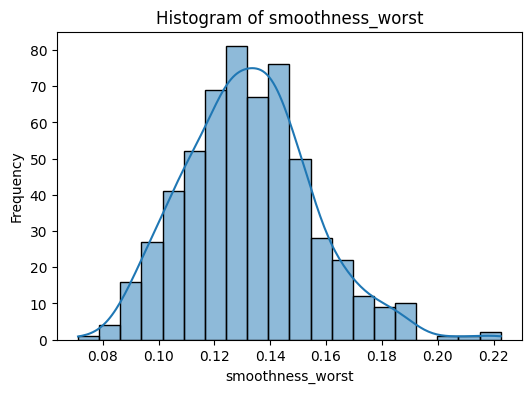

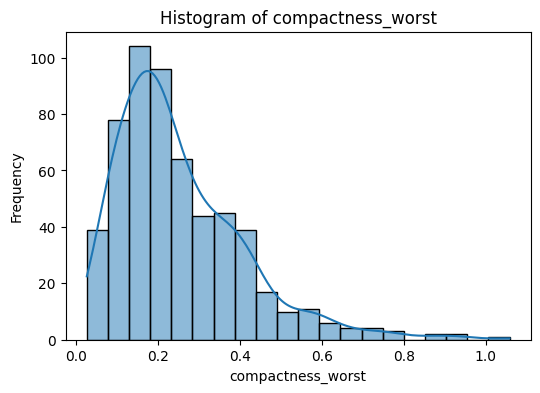

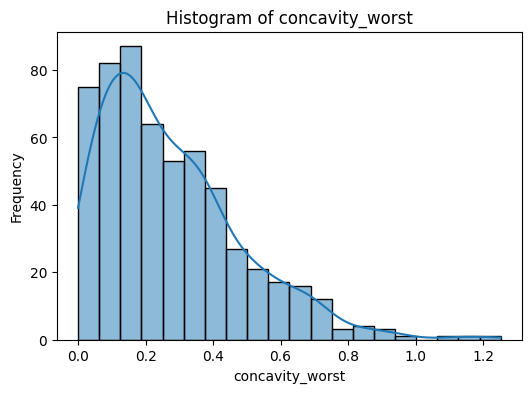

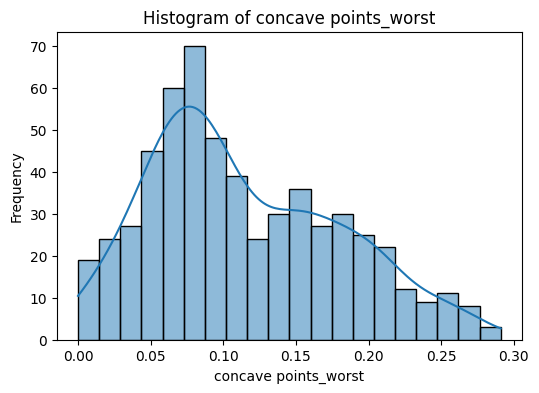

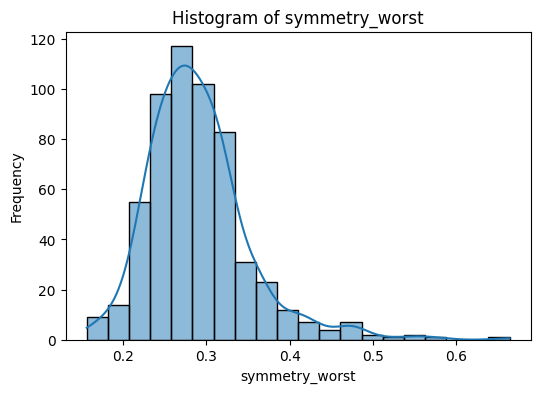

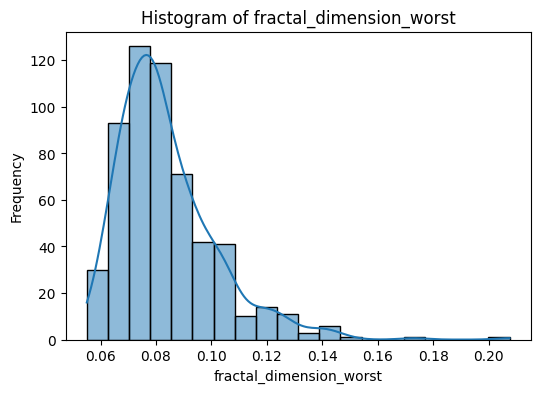


Bar Charts:


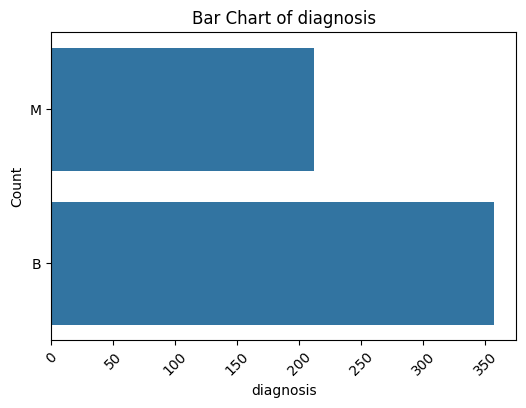

Logistic Regression:
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Decision Tree Classifier:
Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114

Linear Discriminant Analysis (LDA):
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy

In [8]:

file_path = '/content/drive/My Drive/Cancer_Data.csv'
data3 = pd.read_csv(file_path)

# Data Cleaning
data3 = data3.drop_duplicates()
print("Missing values before handling:")
print(data3.isnull().sum())

columns_to_remove = ['id']
data3 = data3.drop(columns=columns_to_remove, errors='ignore')

EDA(data3)

# Convert categorical to numeric using manual mapping
data3['diagnosis'] = data3['diagnosis'].map({'M': 1, 'B': 0})

X = data3.drop('diagnosis', axis=1)
y = data3['diagnosis']


# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and fit models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Linear Discriminant Analysis (LDA)": LinearDiscriminantAnalysis(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


Class Distribution Before Feature Engineering:
diagnosis
0    357
1    212
Name: count, dtype: int64


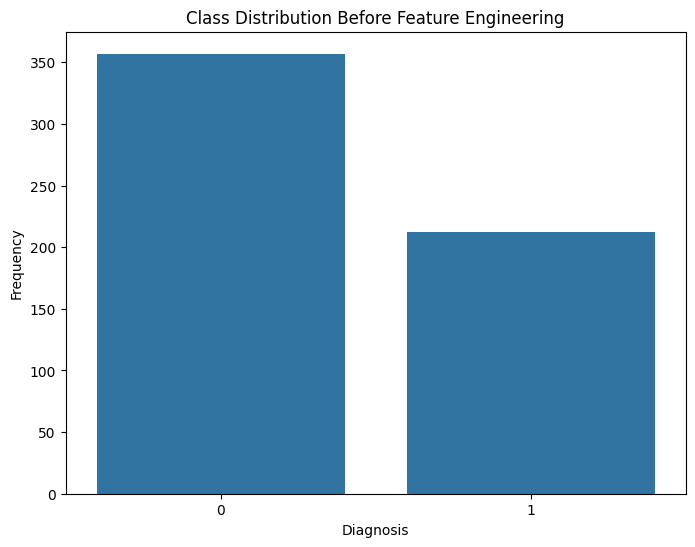


Baseline Performance on Imbalanced Data:
Logistic Regression - Mean Accuracy: 0.9725266362252662 ± 0.017328217311057454
Decision Tree - Mean Accuracy: 0.9066590563165906 ± 0.031568645784793084
K-Nearest Neighbors - Mean Accuracy: 0.9505707762557076 ± 0.01853256974756226
Linear Discriminant Analysis - Mean Accuracy: 0.9506088280060881 ± 0.030699439082127862
Naive Bayes - Mean Accuracy: 0.9286149162861491 ± 0.02647001851851247
Class Distribution in Training Set After Feature Engineering:
diagnosis
0    228
1    136
Name: count, dtype: int64


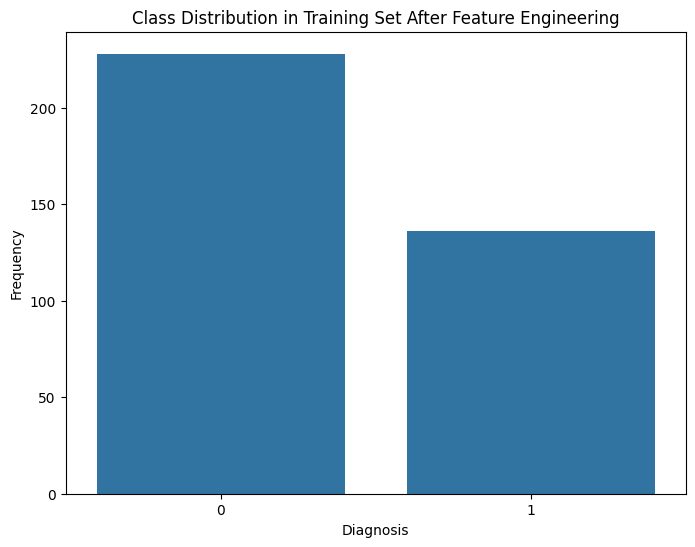


Performance After Feature Engineering:

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        72
           1       0.92      0.83      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        72
           1       0.94      0.71      0.81        42

    accuracy    

In [6]:
# Check class distribution
class_distribution_before = data3['diagnosis'].value_counts()
print("Class Distribution Before Feature Engineering:")
print(class_distribution_before)

# Plot class distribution before feature engineering
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data3)
plt.title('Class Distribution Before Feature Engineering')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.show()

# Prepare data
X = data3.drop('diagnosis', axis=1)
y = data3['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Further split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB()
}
# Perform cross-validation and record metrics
print("\nBaseline Performance on Imbalanced Data:")
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Mean Accuracy: {scores.mean()} ± {scores.std()}")


# Feature Engineering using Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Check class distribution in the training set
class_distribution_train = pd.Series(y_train).value_counts()
print("Class Distribution in Training Set After Feature Engineering:")
print(class_distribution_train)

# Plot class distribution in the training set after feature engineering
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set After Feature Engineering')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.show()

# Performance After Feature Engineering
print("\nPerformance After Feature Engineering:")
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_poly, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test_poly)

    # Evaluate the model
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
